<img src='./img/intel-logo.png' width=50%>

# 인텔코리아 객체인식 강의자료 3강
<font size=5><b>(Training Mobile Single Shot Dectector)<b></font>

<div align='right'> 이 인 구 (Ike Lee) </div>
<div align='right'> 성 민 석 (Minsuk Sung) </div>
<div align='right'> 류 회 성 (Hoesung Ryu) </div>

<h1>Lecture Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mobile-Single-Shot-Dector-(Mobile-SSD)" data-toc-modified-id="Mobile-Single-Shot-Dector-(Mobile-SSD)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mobile Single Shot Dector (Mobile SSD)</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Download-Pretrained-model" data-toc-modified-id="Download-Pretrained-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Download Pretrained model</a></span></li><li><span><a href="#Training-Mobile-SSD-model" data-toc-modified-id="Training-Mobile-SSD-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training Mobile SSD model</a></span><ul class="toc-item"><li><span><a href="#Editing-config-file" data-toc-modified-id="Editing-config-file-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Editing config file</a></span></li><li><span><a href="#Training-our-models" data-toc-modified-id="Training-our-models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training our models</a></span></li><li><span><a href="#Export-inference-graph-&amp;-Generate-pb-file" data-toc-modified-id="Export-inference-graph-&amp;-Generate-pb-file-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Export inference graph &amp; Generate pb file</a></span></li></ul></li><li><span><a href="#모델-평가하기" data-toc-modified-id="모델-평가하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델 평가하기</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

---

## Mobile Single Shot Dector (Mobile SSD)

![](https://miro.medium.com/max/2870/1*up-gIJ9rPkHXUGRoqWuULQ.jpeg)

 본 튜토리얼은 `Tensorflow Object Detection API`를 사용해 사용자가 원하는 특정 객체를 빠르게 검출할 수 있는 `Mobile SSD` 모델을 학습해보도록 합니다. 이번 튜토리얼도 앞선 튜토리얼처럼 모델을 학습시켜야 하는 모든 과정이 포함되어 있기 때문에 많은 시간이 소요됩니다.

![](https://miro.medium.com/max/2460/1*0ogh_9xVCQ2AMbW6ehC9YQ.png)

앞에서 Faster R-CNN을 가져와서 원하는 클래스를 학습시켰습니다. 하지만 이런 Faster R-CNN의 단점은 Object Detection 모델 중에서도 2 Stage 모델이기 때문에 생각보다 무겁다는 점인데요. 그래서 이번 시간에는 가볍지만 성능도 좋은 `Mobile SSD` 모델로 학습하는 시간을 가져보도록 하겠습니다.

---

## Data

![](https://miro.medium.com/max/680/1*P-bMHm-VdNqUl2d_zrSeVA.jpeg)

앞선 강의에서 이미 XML파일을 CSV파일로 만들고 다시 CSV파일을 TFRecord파일로 만드는 작업을 진행했기 때문에, 이번 튜토리얼에서는 이 부분을 생략하도록 하겠습니다. `data`폴더에 `train.record`와 `test.record`파일이 존재하지 않는다면, 이전 튜토리얼로 돌아가셔서 데이터를 생성해주시고 아래 남은 부분을 실습해보시길 바랍니다.

---

## Download Pretrained model

![](./img/tensorflow_github.png)

Tensorflow에서 제공하는 Object Detection Model은 모두 [Google GitHub](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md)을 통해서 이용가능합니다. 이번 시간에는 1강에서 사용했던 모델을 그대로 활용할 것이기 때문에 별도의 다운로드는 진행하지 않겠습니다. 하지만 어떤 이유로 인하여 모델 관련 파일이 손상됐거나 손실됐을 경우 아래와 같은 방법으로 다시 다운로드해주시길 바랍니다.

In [1]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'    

```python
get_pretrained_model(model_name) # 모델 다운로드
```

```sh
!cd models && ls

!file ./models/ssd_mobilenet_v1_coco_2018_01_28

!cd ./models && tar -xvf ssd_mobilenet_v1_coco_2018_01_28

!cd ./models && rm ssd_mobilenet_v1_coco_2018_01_28.tar.gz && cd ssd_mobilenet_v1_coco_2018_01_28.tar.gz && ls
```

In [2]:
PRETRAINED_MODEL_PATH = './models/my_mobile_ssd'
PATH_TO_FROZEN_GRAPH = PRETRAINED_MODEL_PATH + '/' + MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_FROZEN_GRAPH

'./models/my_mobile_ssd/ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb'

그리고 여기에서 우리가 사용할 부분은 `config`파일입니다. 이 파일을 각 모델로 복사하여 가져옵시다.

In [ ]:
# !cp pretrained_model/ssd_mobilenet_v1_coco_2018_01_28/pipeline.config models/my_mobile_ssd/

---

## Training Mobile SSD model

<img src='https://i0.wp.com/blogs.cfainstitute.org/investor/files/2018/01/Artificial-Intelligence-Machine-Learning-and-Deep-Learning-A-Primer.png?resize=940%2C575&ssl=1' width=50%>

 Tensorflow API를 통해서 Object Detection 모델을 학습하는 과정은 요약하자면 위에서 만들어진 `record`, `config`와 `pbtxt` 세가지 파일을 가지고` ckpt`파일을 만들고 원하는 ckpt파일에서 추출하여 `pb`파일을 얻는 과정입니다. 학습을 진행하기에 앞서, `config`파일을 수정해야합니다. 그 이유는 복사해온 config파일은 기존의 Pretrained model의 label을 학습하기 위한 파일이기 때문에 우리의 입맛에 맞게 수정해줘야합니다. config파일에는 전체적인 모델의 요약된 정보부터 어떤 tfrecord로 학습하여 ckpt를 어디에 저장할지까지 수많은 정보가 있습니다. 이러한 config파일을 통하여 ckpt가 생성이 되면 추론에 사용할 수 있는 가중치 파일인 `pb`파일을 생성할 수 있습니다.

### Editing config file

위에서 다운로드한 pretrained model에서 pipeline.config를 찾는다. 


기존 파일에서는 `num_classes`의 값이 90으로 되어있다. 이 값을 37로 변경해주자.
> num_classes = 37

또한 아래에서 `PATH_TO_BE_CONFIGURED`로 되어 있는 부분들을 변경해주자. 이 값들은 총 5개가 있는데 경로에 알맞게 변경해주자. 일단 가장 처음으로 ckpt파일의 위치를 지정해주어야한다. 
> fine_tune_checkpoint: "`pretrained_model/ssd_mobilenet_v1_coco_2018_01_28`/model.ckpt"

다음으로 train에서의 값들을 변경해주어야한다.
> label_map_path: "`models`/`label_map`/pet_label_map.pbtxt"  
> input_path: "`data`/`train`.record"

마지막으로 test에서의 값들을 변경해주어야한다.
> label_map_path: "`models`/`label_map`/pet_label_map.pbtxt"  
> input_path: "`data`/`test`.record"

> 최종 config파일은 models폴더로 가서 pipline_pet_ssd.config로 저장

### Training our models

 여기까지 학습을 위한 준비과정은 끝났습니다. 지금부터는 본격적으로 학습을 진행보도록 하겠습니다. 학습이 진행됨에 따라서 나오는 ckpt 파일은 각 모델의 checkpoint 폴더에 저장 됩니다. 만약 NUC에서 진행할 경우, 상당히 오랜 시간이 소요되므로, 불가피한 경우가 아니라면 GPU가 있는 서버와 같은 환경에서 진행하시길 바랍니다.
 
```
NUM_TRAIN_STEPS= 학습시킬 횟수
NUM_EVAL_STEPS= 검증시킬 횟수 

```

학습시 기존 checkpoint 폴더를 삭제하고 진행하시길 바랍니다.

In [6]:
%%time
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim:`pwd`/object_detection && \
PIPELINE_CONFIG_PATH=models/pipeline_pet_ssd.config && \
MODEL_DIR=models/checkpoint && \
NUM_TRAIN_STEPS=90000 && \
NUM_EVAL_STEPS=2000 && \
python3 object_detection/model_main.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --model_dir=${MODEL_DIR} \
    --num_train_steps=${NUM_TRAIN_STEPS} \
    --num_eval_steps=${NUM_EVAL_STEPS} \
    --alsologtostderr

/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: Futu


W1012 19:56:34.722697 140478415238912 deprecation_wrapper.py:119] From /home/intel/Desktop/intel-object-detection-final/object_detection/data_decoders/tf_example_decoder.py:182: The name tf.FixedLenFeature is deprecated. Please use tf.io.FixedLenFeature instead.


W1012 19:56:34.722886 140478415238912 deprecation_wrapper.py:119] From /home/intel/Desktop/intel-object-detection-final/object_detection/data_decoders/tf_example_decoder.py:197: The name tf.VarLenFeature is deprecated. Please use tf.io.VarLenFeature instead.


W1012 19:56:34.743197 140478415238912 deprecation_wrapper.py:119] From /home/intel/Desktop/intel-object-detection-final/object_detection/builders/dataset_builder.py:64: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.

W1012 19:56:34.743973 140478415238912 dataset_builder.py:72] num_readers has been reduced to 1 to match input file shards.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
W1012 19:56:34.748230 140

W1012 19:56:36.478268 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36f8374e0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36f8374e0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:36.538699 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc36f7c94a8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1012 19:56:36.797468 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc36f66d940>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc36f66d940>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:36.936086 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36f83df28>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:56:37.233505 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc3a96f9e48>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc3a96f9e48>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:37.295937 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a9778ba8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1012 19:56:37.578575 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36f5fd8d0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36f5fd8d0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:37.618591 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc3a8aae7b8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

W1012 19:56:37.942162 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a9572ef0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a9572ef0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:37.965411 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36fb3d780>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:56:38.332609 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc36f8b2da0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc36f8b2da0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:38.361273 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc36fcafdd8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:56:38.794836 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a89b6940>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a89b6940>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:38.823948 140478415238912 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fc3a8e8fb70>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

INFO:tensorflow:depth of additional conv before box predictor: 0
I1012 19:56:39.655901 140478415238912 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1012 19:56:39.717087 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a8bb39e8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a8bb39e8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:56:39.781089 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a8bb3b38>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap

W1012 19:56:40.155400 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a8ac2dd8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a8ac2dd8>>: AssertionError: Bad argument number for Name: 3, expecting 4
INFO:tensorflow:depth of additional conv before box predictor: 0
I1012 19:56:40.158444 140478415238912 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1012 19:56:40.218569 140478415238912 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fc3a919dbe0>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap


W1012 19:56:44.726860 140478415238912 deprecation_wrapper.py:119] From /home/intel/Desktop/intel-object-detection-final/object_detection/model_lib.py:380: The name tf.train.get_or_create_global_step is deprecated. Please use tf.compat.v1.train.get_or_create_global_step instead.


W1012 19:56:44.727116 140478415238912 deprecation_wrapper.py:119] From /home/intel/Desktop/intel-object-detection-final/object_detection/utils/learning_schedules.py:66: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.


W1012 19:56:44.733808 140478415238912 deprecation_wrapper.py:119] From /home/intel/Desktop/intel-object-detection-final/object_detection/builders/optimizer_builder.py:47: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1012 19:56:46.364223 140478415238912 depre

### Export inference graph & Generate pb file
충분히 학습을 시켰다고 생각되면, 이제 학습을 중단시키고 학습된 모델을 export해야 합니다. Export된 모델은 이 예제에 그대로 적용할 수 있습니다. 아래와 같이, Checkpoint가 생성된 것을 확인할 수 있습니다. 이 Checkpoint를 frozen graph로 export 하는 것입니다. training 디렉토리에서 ls를 해 보면, 아래와 같이 여러개의 checkpoint 파일 (model.ckpt-XXXX.* 파일)이 보입니다. 이 중에서 XXXX의 숫자가 가장 큰 것이 마지막으로 생성된 checkpoint 파일입니다.

> export_inference_graph.py를 실행시킬 때, `--trained_checkpoint_prefix` 파라미터에 숫자를 틀리지 않게 지정해야 합니다. 각자 생성된 checkpoint에 따라 알맞는 숫자를 사용하세요.

In [7]:
%%time
!export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim:`pwd`/object_detection && \
PIPELINE_CONFIG_PATH=models/pipeline_pet_ssd.config && \
TRAINED_CKPT_PREFIX=models/checkpoint/model.ckpt-100000 && \
OUTPUT_DIR=models/freeze && \
python3 object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path ${PIPELINE_CONFIG_PATH} \
    --trained_checkpoint_prefix ${TRAINED_CKPT_PREFIX} \
    --output_directory ${OUTPUT_DIR}

/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

W1012 19:58:07.145743 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ef26208>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ef26208>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:07.202843 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95ef28c18>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1012 19:58:07.476470 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ed6dcc0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ed6dcc0>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:07.511786 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ed51fd0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

W1012 19:58:07.814229 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95ec4dac8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95ec4dac8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:07.846772 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ef35ef0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:58:08.231615 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95ea70f28>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95ea70f28>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:08.254952 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95ed6def0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:58:08.659412 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95e8f16d8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95e8f16d8>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:08.733105 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95ef297b8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: conv

W1012 19:58:09.060772 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95efa7128>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95efa7128>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:09.089241 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95e7ba940>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:58:09.402780 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95efa7208>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95efa7208>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:09.442737 140366412236544 ag_logging.py:145] Entity <bound method BatchNormalization.call of <tensorflow.python.layers.normalization.BatchNormalization object at 0x7fa95e63cda0>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Batch

W1012 19:58:10.226773 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95e197780>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95e197780>>: AssertionError: Bad argument number for Name: 3, expecting 4
INFO:tensorflow:depth of additional conv before box predictor: 0
I1012 19:58:10.232971 140366412236544 convolutional_box_predictor.py:151] depth of additional conv before box predictor: 0
W1012 19:58:10.293649 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95e1a7e10>> could not be transformed and will be executed as-is. Please report this to the AutgoGrap

W1012 19:58:10.779926 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95e096710>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95e096710>>: AssertionError: Bad argument number for Name: 3, expecting 4
W1012 19:58:10.849594 140366412236544 ag_logging.py:145] Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7fa95e096710>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python

Incomplete shape.

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
param: Number of parameters (in the Variable).

Profile:
node name | # parameters
_TFProfRoot (--/6.02m params)
  BoxPredictor_0 (--/64.64k params)
    BoxPredictor_0/BoxEncodingPredictor (--/6.16k params)
      BoxPredictor_0/BoxEncodingPredictor/biases (12, 12/12 params)
      BoxPredictor_0/BoxEncodingPredictor/weights (1x1x512x12, 6.14k/6.14k params)
    BoxPredictor_0/ClassPredictor (--/58.48k params)
      BoxPredictor_0/ClassPredictor/biases (114, 114/114 params)
      BoxPredictor_0/ClassPredictor/weights (1x1x512x114, 58.37k/58.37k params)
  BoxPredictor_1 (--/258.30k params)
    BoxPredictor_1/BoxEncodingPredictor (--/24.60k params)
      BoxPredictor_1/BoxEncodingPredictor/biases (24, 24/24 params)
      BoxPredictor_1/BoxEncodingPredictor/weights (1x1x1024x24, 24.58k/24.58k params)
    BoxPredictor_1/ClassPredictor (--/233.70k params)
      BoxPre

224 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

2020-10-12 19:58:15.121048: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-12 19:58:15.145759: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3499910000 Hz
2020-10-12 19:58:15.145970: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8ad6c10 executing computations on platform Host. Devices:
2020-10-12 19:58:15.145985: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
Instructions for updating:
Use standard file APIs to check for files with this prefix.
W1012 19:58:15.146311 140366412236544 deprecation.py:323] From /home/intel/.local/lib/python3.5/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check fo

CPU times: user 222 ms, sys: 46.3 ms, total: 269 ms
Wall time: 14.5 s


---

## 모델 평가하기 

![](https://pngimage.net/wp-content/uploads/2018/06/test-png-5.png)

In [8]:
import os
import sys
import glob
import platform
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

from utils.func import *
from utils.detector import ObjectDetector

/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [9]:
print('OS System : {}'.format(platform.system()))
print('Tensorflow Version : {}'.format(tf.__version__))
assert tf.__version__ == '1.14.0'

OS System : Linux
Tensorflow Version : 1.14.0


In [10]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'models/label_map/pet_label_map.pbtxt'

In [11]:
PATH_TO_CKPT = 'models/freeze/frozen_inference_graph.pb'

In [12]:
NUM_CLASSES = 37
label_map, categories, category_index = get_label_category_index(PATH_TO_LABELS, NUM_CLASSES)
print(category_index)

{1: {'id': 1, 'name': 'Abyssinian'}, 2: {'id': 2, 'name': 'american_bulldog'}, 3: {'id': 3, 'name': 'american_pit_bull_terrier'}, 4: {'id': 4, 'name': 'basset_hound'}, 5: {'id': 5, 'name': 'beagle'}, 6: {'id': 6, 'name': 'Bengal'}, 7: {'id': 7, 'name': 'Birman'}, 8: {'id': 8, 'name': 'Bombay'}, 9: {'id': 9, 'name': 'boxer'}, 10: {'id': 10, 'name': 'British_Shorthair'}, 11: {'id': 11, 'name': 'chihuahua'}, 12: {'id': 12, 'name': 'Egyptian_Mau'}, 13: {'id': 13, 'name': 'english_cocker_spaniel'}, 14: {'id': 14, 'name': 'english_setter'}, 15: {'id': 15, 'name': 'german_shorthaired'}, 16: {'id': 16, 'name': 'great_pyrenees'}, 17: {'id': 17, 'name': 'havanese'}, 18: {'id': 18, 'name': 'japanese_chin'}, 19: {'id': 19, 'name': 'keeshond'}, 20: {'id': 20, 'name': 'leonberger'}, 21: {'id': 21, 'name': 'Maine_Coon'}, 22: {'id': 22, 'name': 'miniature_pinscher'}, 23: {'id': 23, 'name': 'newfoundland'}, 24: {'id': 24, 'name': 'Persian'}, 25: {'id': 25, 'name': 'pomeranian'}, 26: {'id': 26, 'name': 

In [16]:
# Path to image
print(glob.glob('img/test_pet/*.jpg'))

['img/test_pet/beagle_197.jpg', 'img/test_pet/Bengal_60.jpg', 'img/test_pet/japanese_chin_199.jpg', 'img/test_pet/Abyssinian_3.jpg']


In [17]:
# 추론하기 위한 모델 생성
myMobileSSD = ObjectDetector(PATH_TO_LABELS, PATH_TO_CKPT, NUM_CLASSES)

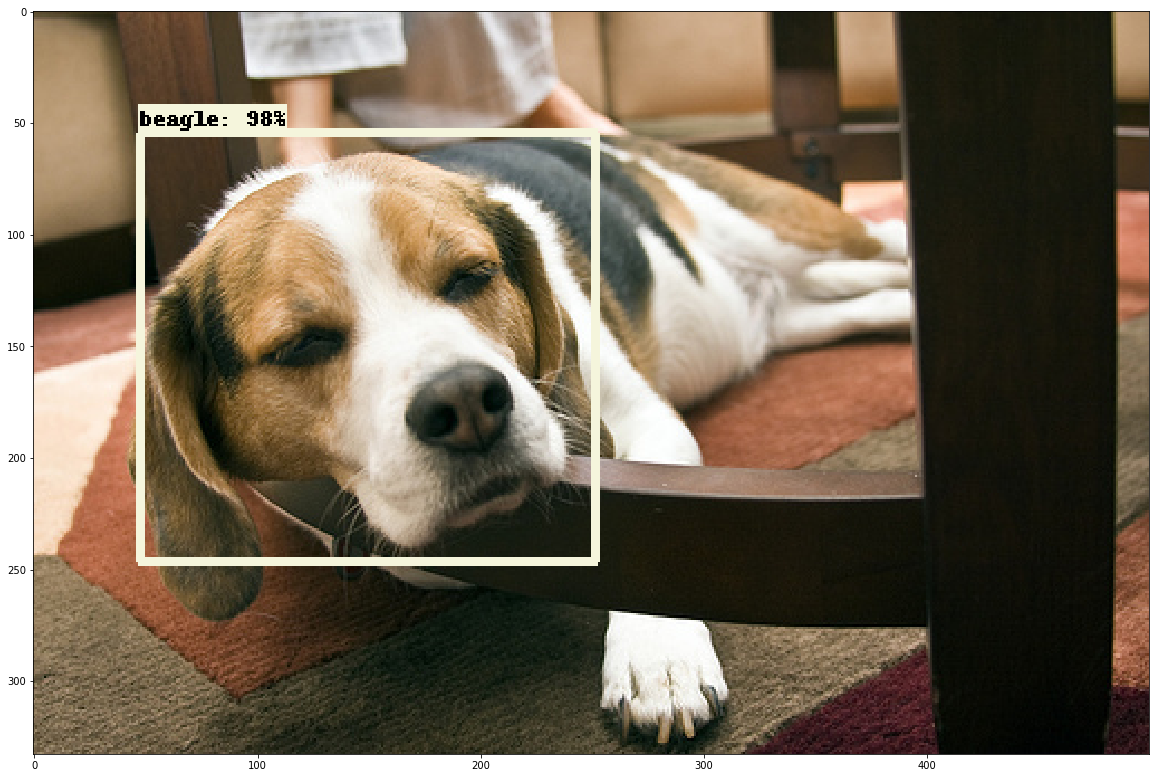

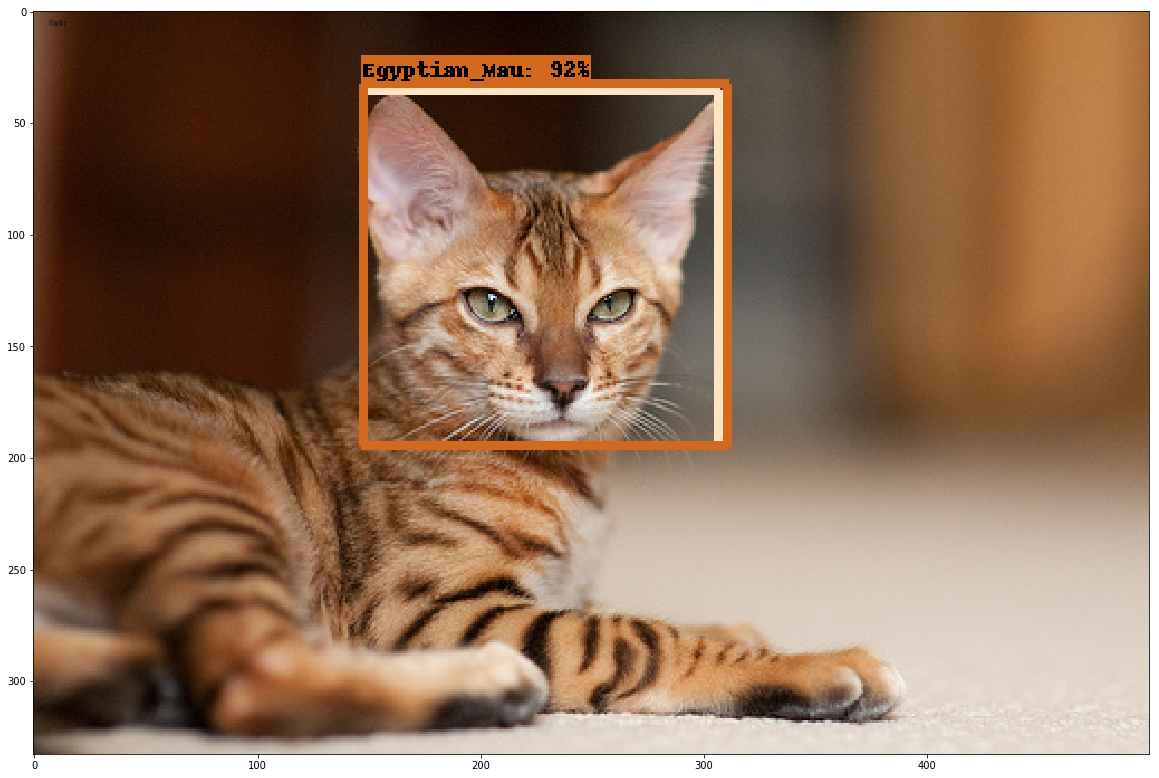

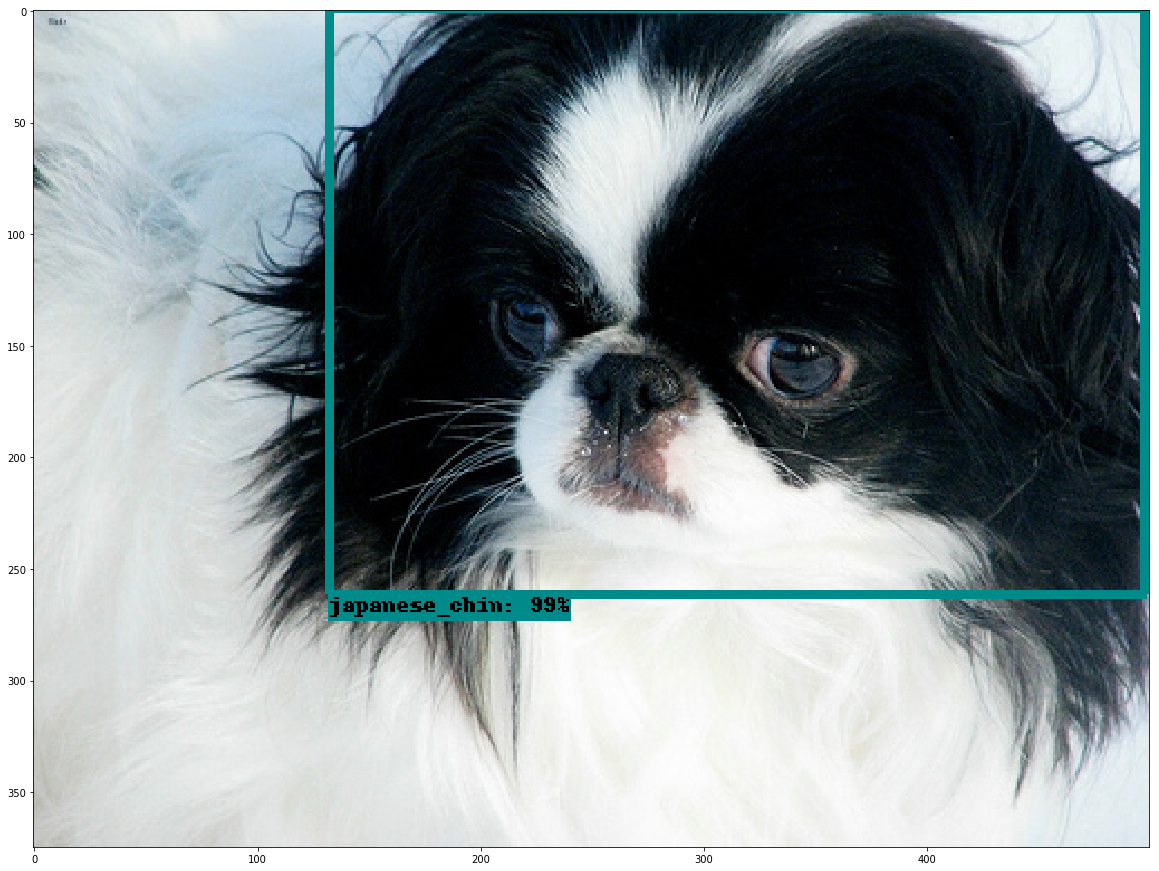

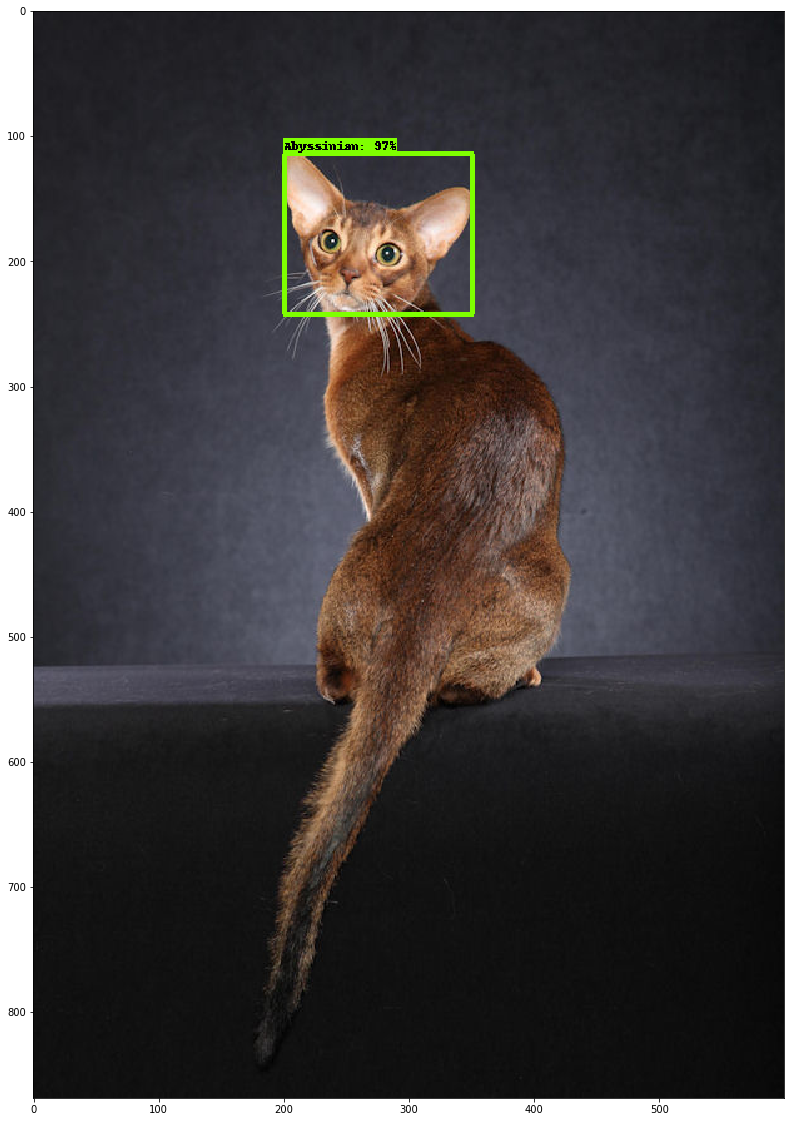

In [18]:
%matplotlib inline
for img_path in glob.glob('img/test_pet/*.jpg'):
    myMobileSSD.get_detected_info(img_path,category_index)

---

## Reference

- https://ukayzm.github.io/pet-training/
- https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06